In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import json

In [3]:
font = {'size': 12}

matplotlib.rc('font', **font)

This notebook is mainly for fusing the data of test "sv_maxpool overnight 5", which is divided into several runs. If you squint, the code looks well-organized :)

In [4]:
# Some arrays of values for each run, sorted

# number of epochs
RUNS_EPOCHS = np.array([88_001, 240_000])

# in which epoch they started and stopped
RUNS_START = np.array([0, 90_000])
RUNS_STOP = np.array([90_000, 328_001])

# log period
RUNS_LOG_PERIOD = np.array([2_000, 2_000])

# initial learning rate
RUNS_LR = np.array([5e-3, 2e-4])

# learning rate decay (gamma)
RUNS_GAMMA = np.array([0.97, 0.985])

# learning rate decay (step_size)
RUNS_LR_STEP = np.array([500, 1_000])

# path to output files
RUNS_OUTPUT = ["saves/sv_maxpool overnight 5/output", "saves/sv_maxpool overnight 5_2/output"]

In [6]:
# define epoch timeline
epochs = np.concatenate([
    np.arange(start, stop, step)
    for start, stop, step in zip(RUNS_START, RUNS_STOP, RUNS_LOG_PERIOD)
])

# load training loss data
_loss_train = []
for path in RUNS_OUTPUT:
    with open(path + "/loss_train.txt", "r") as f:
        _loss_train.append(json.load(f))
loss_train = np.concatenate(_loss_train)

# load test loss data
_loss_test = []
for path in RUNS_OUTPUT:
    with open(path + "/loss_test.txt", "r") as f:
        _loss_test.append(json.load(f))
loss_test = np.concatenate(_loss_test)

# load sigma data
_sigmas = []
for path in RUNS_OUTPUT:
    with open(path + "/sigmas.txt", "r") as f:
        _sigmas.append(json.load(f))
sigmas = np.concatenate(_sigmas)

In [7]:
# define learning rate
lr = np.concatenate([
    start * gamma ** (np.arange(0, e, log_step) / lr_step)
    for start, gamma, lr_step, log_step, e in zip(RUNS_LR, RUNS_GAMMA, RUNS_LR_STEP, RUNS_LOG_PERIOD, RUNS_EPOCHS)
])

In [18]:
# load data from run 6
epochs_6 = np.arange(0, 240_000, 2000) + 52_000

with open("saves/sv_maxpool overnight 6/output/loss_test.txt") as f:
    loss_test_6 = np.array(json.load(f))[1:]

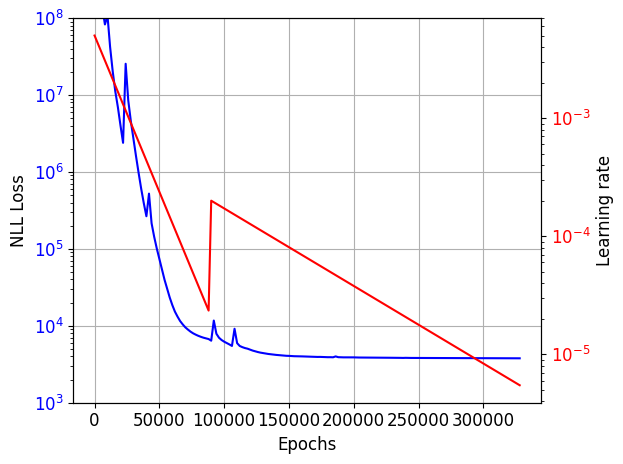

In [142]:
fig, ax1 = plt.subplots()

# plot loss
ax1.set_xlabel("Epochs")
ax1.set_ylabel("NLL Loss")
ax1.tick_params(axis='y', labelcolor="blue")
# ax1.plot(epochs, loss_train, color="blue")
ax1.plot(epochs, loss_test, color="blue")

ax1.set_ylim(1e3, 1e8)
ax1.semilogy()

# plot learning rate
ax2 = ax1.twinx()
ax2.set_ylabel("Learning rate")
ax2.plot(epochs, lr, color="red")
ax2.tick_params(axis='y', labelcolor="red")

ax2.semilogy()

fig.tight_layout()
ax1.grid()
plt.show()

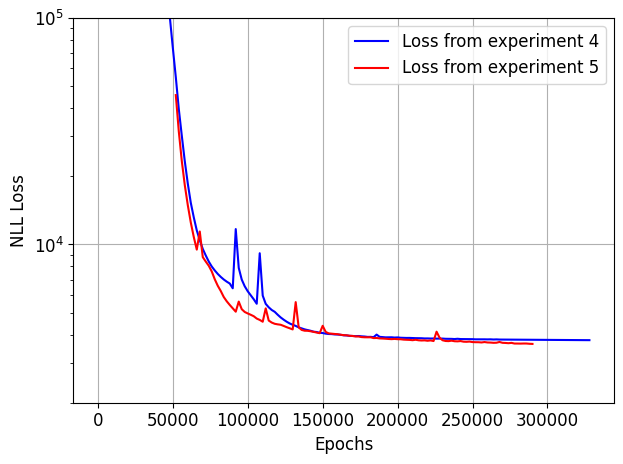

In [34]:
plt.plot(epochs, loss_test, color="blue", label="Loss from experiment 4")
plt.plot(epochs_6, loss_test_6, color="red", label="Loss from experiment 5")

plt.xlabel("Epochs")
plt.ylabel("NLL Loss")

plt.grid()
plt.legend()
plt.semilogy()
plt.ylim(2e3, 1e5)
plt.tight_layout()
plt.show()

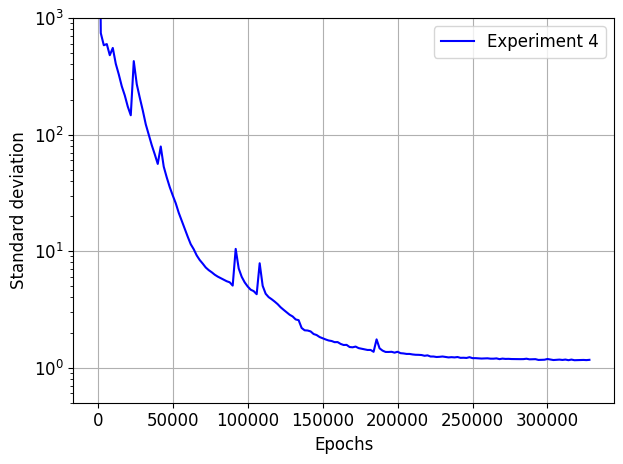

In [45]:
plt.plot(epochs, sigmas, color="blue", label="Experiment 4")

plt.xlabel("Epochs")
plt.ylabel("Standard deviation")

plt.grid()
plt.legend()
plt.semilogy()
plt.ylim(0.5, 1e3)
plt.tight_layout()
plt.show()

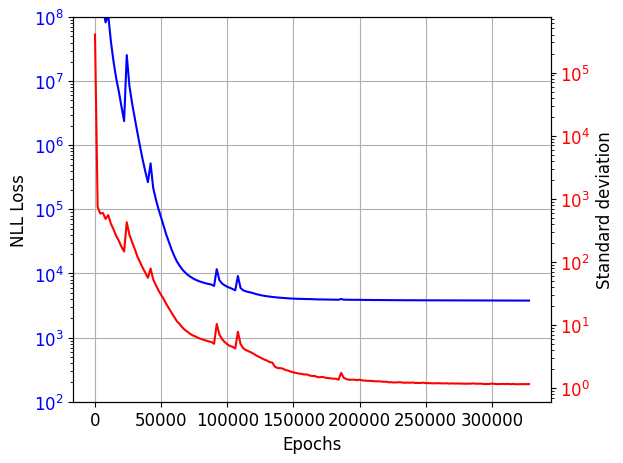

In [47]:
fig, ax1 = plt.subplots()

# plot loss
ax1.set_xlabel("Epochs")
ax1.set_ylabel("NLL Loss")
ax1.tick_params(axis='y', labelcolor="blue")
# ax1.plot(epochs, loss_train, color="blue")
ax1.plot(epochs, loss_test, color="blue")

ax1.set_ylim(1e2, 1e8)
ax1.semilogy()

# plot learning rate
ax2 = ax1.twinx()
ax2.set_ylabel("Standard deviation")
ax2.plot(epochs, sigmas, color="red")
ax2.tick_params(axis='y', labelcolor="red")

ax2.semilogy()

fig.tight_layout()
ax1.grid()
plt.show()